In [40]:
import numpy as np
import pandas as pd
import scipy.optimize

from IPython.display import display, HTML

In [19]:
hypotheses = 'hello world'
priors = (0.5, 0.8)
likelihoods = (1.0, 0.6)

In [68]:
def finite_bayes(hypotheses, priors, likelihoods, doprint=True):
    # Sanitize the inputs
    if isinstance(hypotheses, str):
        hypotheses = hypotheses.split()
    priors = np.array(priors, dtype=np.double)
    priors /= np.sum(priors, dtype=np.double)
    
    likelihoods = np.array(likelihoods)
    assert(len(priors) == len(likelihoods))
    if doprint:
        assert(len(priors) == len(hypotheses))
    
    # Compute the values
    unnormalized = priors * likelihoods
    normalized = unnormalized / np.sum(unnormalized)
    
    if doprint:
        display(pd.DataFrame(
        np.transpose([hypotheses, priors, likelihoods, unnormalized, normalized]),
            columns='H Pr(H) Pr(D|H) Pr(H)*Pr(D|H) Pr(H|D)'.split()))
    
    return normalized

# finite_bayes('a b c', (1.0, 2.0, 3.0), (3,2,1))

In class we evaluated the probability that I made the correct guess for my phone number. Redo the analysis assuming that my initial probability for a correct guess was 0.2 (rather than 0.5).

In [39]:
finite_bayes('correct wrong', (0.2, 0.8), (1.0, 0.05));

,H,Pr(H),Pr(D|H),Pr(H)*Pr(D|H),Pr(H|D)
0,correct,0.2,1.0,0.2,0.833333333333
1,wrong,0.8,0.05,0.04,0.166666666667


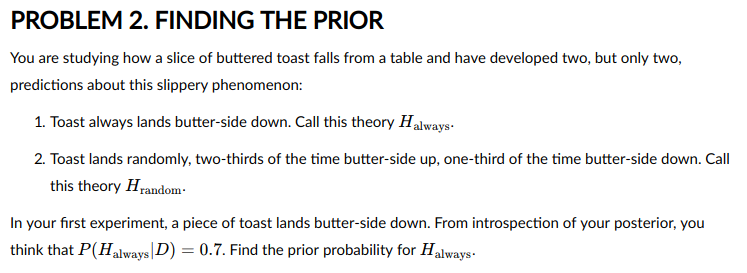

In [61]:
scipy.optimize.fsolve(
    lambda x: 
    finite_bayes('always random', (x[0], 1-x[0]), (1, 1.0/3), False)[0] - 0.7, 0.0)

array([ 0.4375])

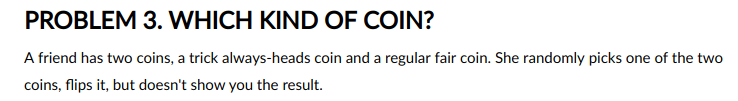

In [62]:
finite_bayes('fair trick', (1,1), (0.5, 1))

,H,Pr(H),Pr(D|H),Pr(H)*Pr(D|H),Pr(H|D)
0,fair,0.5,0.5,0.25,0.333333333333
1,trick,0.5,1.0,0.5,0.666666666667


array([ 0.33333333,  0.66666667])

In [65]:
1.0/3 * 0.5 + 2.0/3 * 1

0.8333333333333333

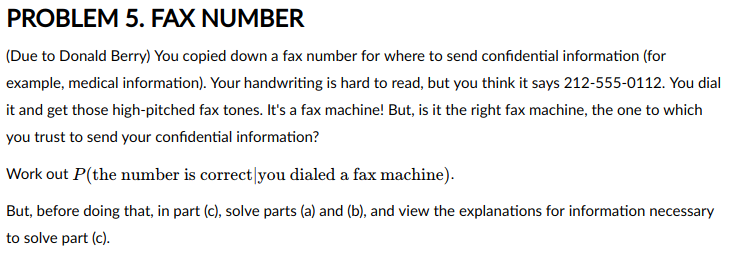

In [66]:
finite_bayes('right wrong', (0.8, 0.2), (1, 0.04))

,H,Pr(H),Pr(D|H),Pr(H)*Pr(D|H),Pr(H|D)
0,right,0.8,1.0,0.8,0.990099009901
1,wrong,0.2,0.04,0.008,0.00990099009901


array([ 0.99009901,  0.00990099])

In [67]:
37/60.0

0.6166666666666667